In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

## Trim and cast labels into wanted format

In [ ]:
labels = np.loadtxt("./ecg_resources/annotations.csv", delimiter=',', skiprows=1, dtype=str)
trimed_labels = np.delete(labels, [0, 1, 2, 3, -1], axis=1) # keeps only these columns -> ['1dAVb' 'RBBB' 'LBBB' 'SB' 'AF' 'ST']
casted_labels = trimed_labels.astype(np.float32)
casted_labels

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]], dtype=float32)

## Find the Minimum Sequence Length in the Dataset

In [1]:
input_path = "./temp_data"
min_length = float("inf")

for file in os.listdir(input_path):
    record = np.load(os.path.join(input_path, file), allow_pickle=True)
    record_signals = record["signals"]
    for i in range(record_signals.shape[0]):
        matrix_length = record_signals[i].shape[0]
        min_length = min(matrix_length, min_length)
print(f"Minimum length of second dimension: {min_length}")

Minimum length of second dimension: 2200


## Check if the saved .npz format is valid

In [7]:
sample = np.load("./data/batch-99.npz")
print(f"Sample contains: {sample.files}")
print(f"Signals shape: {sample["signals"].shape}, Labels shape: {sample["labels"].shape}")
print(f"Singals dtype: {sample["signals"].dtype}, Labels dtype: {sample["labels"].dtype}")

Sample contains: ['signals', 'labels']
Signals shape: (100, 2200, 8), Labels shape: (100, 6)
Singals dtype: float32, Labels dtype: float32


## Visualize data disposition

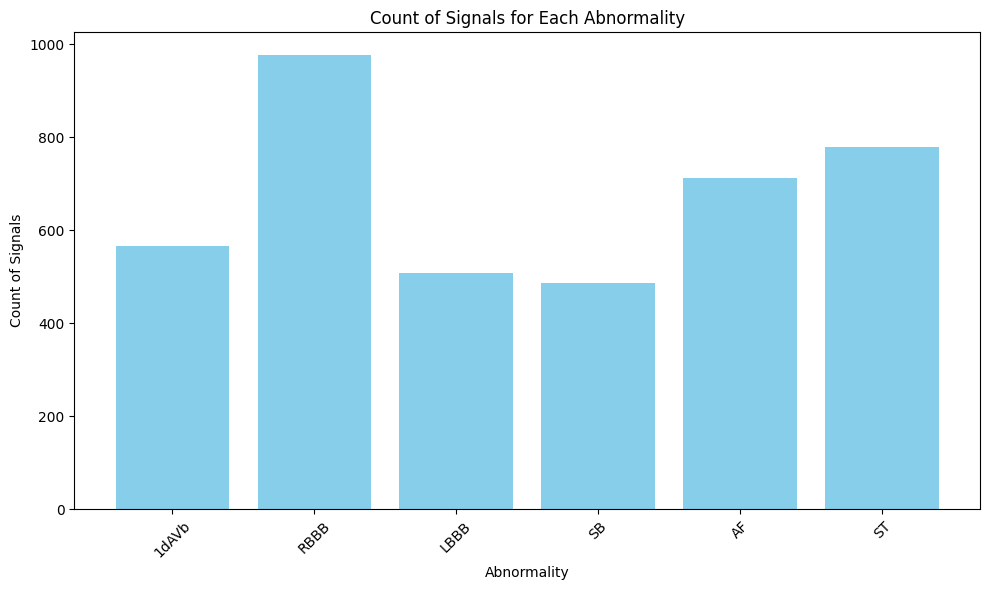

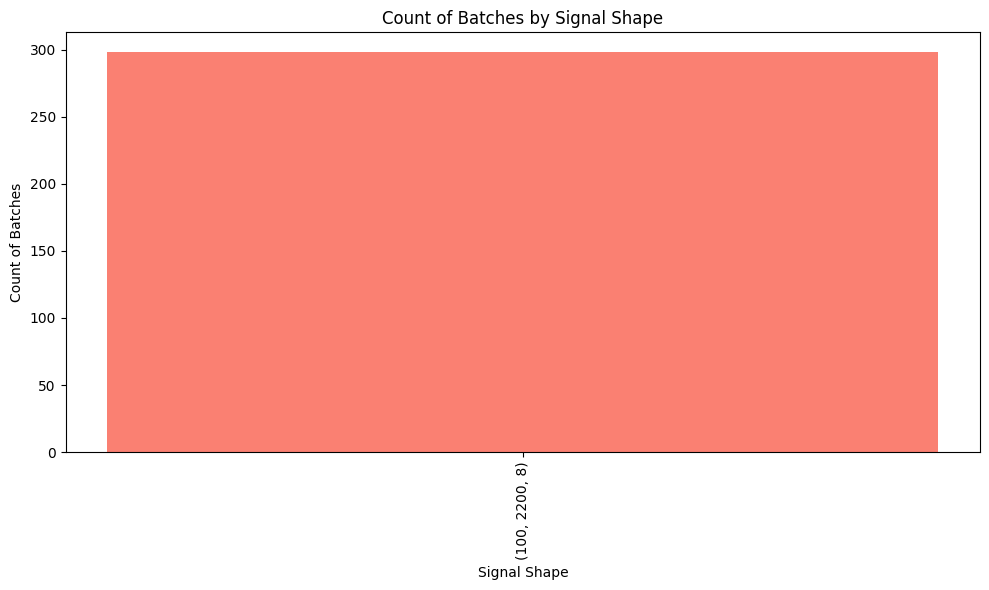

In [5]:
data_path = "./data"

disease_count = {
    '1dAVb': 0,
    'RBBB': 0,
    'LBBB': 0,
    'SB': 0,
    'AF': 0,
    'ST': 0
}

shape_count = {}

batch_files = os.listdir(data_path)


for batch_file in batch_files:
    batch_data = np.load(os.path.join(data_path, batch_file), allow_pickle=True)
    signals = batch_data['signals']
    labels = batch_data['labels']

    batch_shape = signals.shape

    if batch_shape not in shape_count:
        shape_count[batch_shape] = 0
    shape_count[batch_shape] += 1

    for i in range(len(labels)):
        if labels[i, -6] == 1:
            disease_count['1dAVb'] += 1
        if labels[i, -5] == 1:
            disease_count['RBBB'] += 1
        if labels[i, -4] == 1:
            disease_count['LBBB'] += 1
        if labels[i, -3] == 1:
            disease_count['SB'] += 1
        if labels[i, -2] == 1:
            disease_count['AF'] += 1
        if labels[i, -1] == 1:
            disease_count['ST'] += 1


fig, ax1 = plt.subplots(figsize=(10, 6))
diseases = list(disease_count.keys())
counts = list(disease_count.values())
ax1.bar(diseases, counts, color='skyblue')
ax1.set_xlabel('Abnormality')
ax1.set_ylabel('Count of Signals')
ax1.set_title('Count of Signals for Each Abnormality')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

fig, ax2 = plt.subplots(figsize=(10, 6))
shapes = [str(shape) for shape in shape_count.keys()]
shape_counts = list(shape_count.values())
ax2.bar(shapes, shape_counts, color='salmon')
ax2.set_xlabel('Signal Shape')
ax2.set_ylabel('Count of Batches')
ax2.set_title('Count of Batches by Signal Shape')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Check if PyTorch dataset is valid

In [8]:
data = torch.load('dataset.pt', weights_only=False)
print(f"Dataset signals shape: {data["data"].shape}, Dataset labels shape: {data["labels"].shape}")
print(data["data"][0, :5], data["labels"][0, :5])

Dataset signals shape: (298, 100, 2200, 8), Dataset labels shape: (298, 100, 6)
[[[-0.025  -0.015   0.055  ...  0.145   0.035  -0.065 ]
  [-0.025  -0.015   0.045  ...  0.15    0.045  -0.06  ]
  [-0.02   -0.005   0.05   ...  0.155   0.045  -0.055 ]
  ...
  [-0.035  -0.035   0.065  ...  0.14    0.035  -0.065 ]
  [-0.035  -0.035   0.065  ...  0.14    0.035  -0.07  ]
  [-0.025  -0.03    0.065  ...  0.135   0.03   -0.07  ]]

 [[ 0.08    0.18    0.21   ...  0.21    0.25    0.35  ]
  [ 0.045   0.17    0.17   ...  0.2     0.215   0.32  ]
  [ 0.      0.18    0.105  ...  0.19    0.17    0.29  ]
  ...
  [ 0.09    0.215   0.31   ...  0.23    0.285   0.425 ]
  [ 0.1     0.2     0.26   ...  0.215   0.28    0.395 ]
  [ 0.11    0.19    0.23   ...  0.215   0.27    0.37  ]]

 [[-0.5577 -0.2418  3.2682 ...  4.6839  4.3875  4.9023]
  [-0.5616 -0.2418  3.2643 ...  4.6761  4.3797  4.8984]
  [-0.5577 -0.2379  3.2682 ...  4.68    4.3836  4.9023]
  ...
  [-0.468  -2.3439  0.0078 ...  0.6552  0.6825  1.3728]
  